In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [23]:
df = pd.read_csv("CarPrice_Assignment.csv")
df   

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [28]:
from sklearn import preprocessing

df2 = pd.get_dummies(df, columns = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 201 entries, car_ID to cylindernumber_two
dtypes: float64(8), int64(8), uint8(185)
memory usage: 62.8 KB


In [30]:


df = df2.dropna()
     


df.isna().sum()

car_ID                   0
symboling                0
wheelbase                0
carlength                0
carwidth                 0
                        ..
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
cylindernumber_two       0
Length: 201, dtype: int64

car_ID                   0
symboling                0
wheelbase                0
carlength                0
carwidth                 0
                        ..
cylindernumber_four      0
cylindernumber_six       0
cylindernumber_three     0
cylindernumber_twelve    0
cylindernumber_two       0
Length: 201, dtype: int64


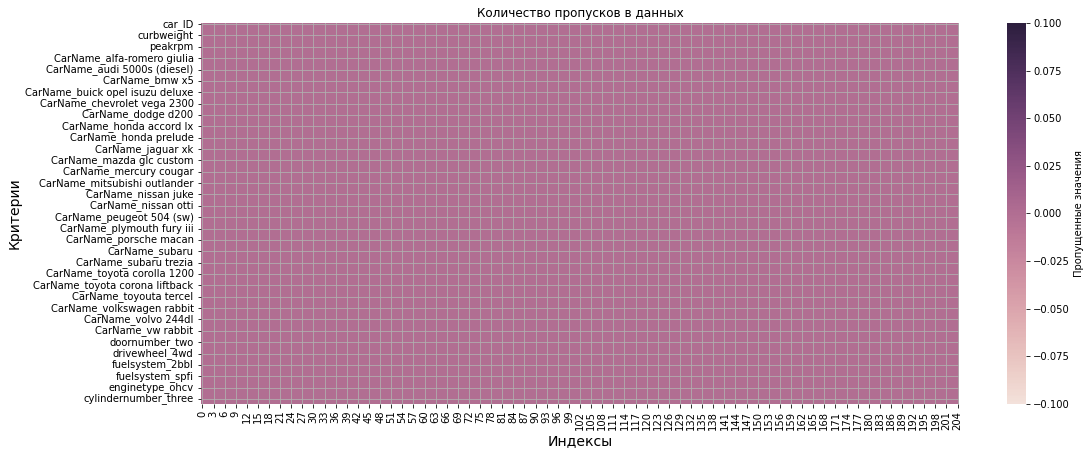

In [31]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

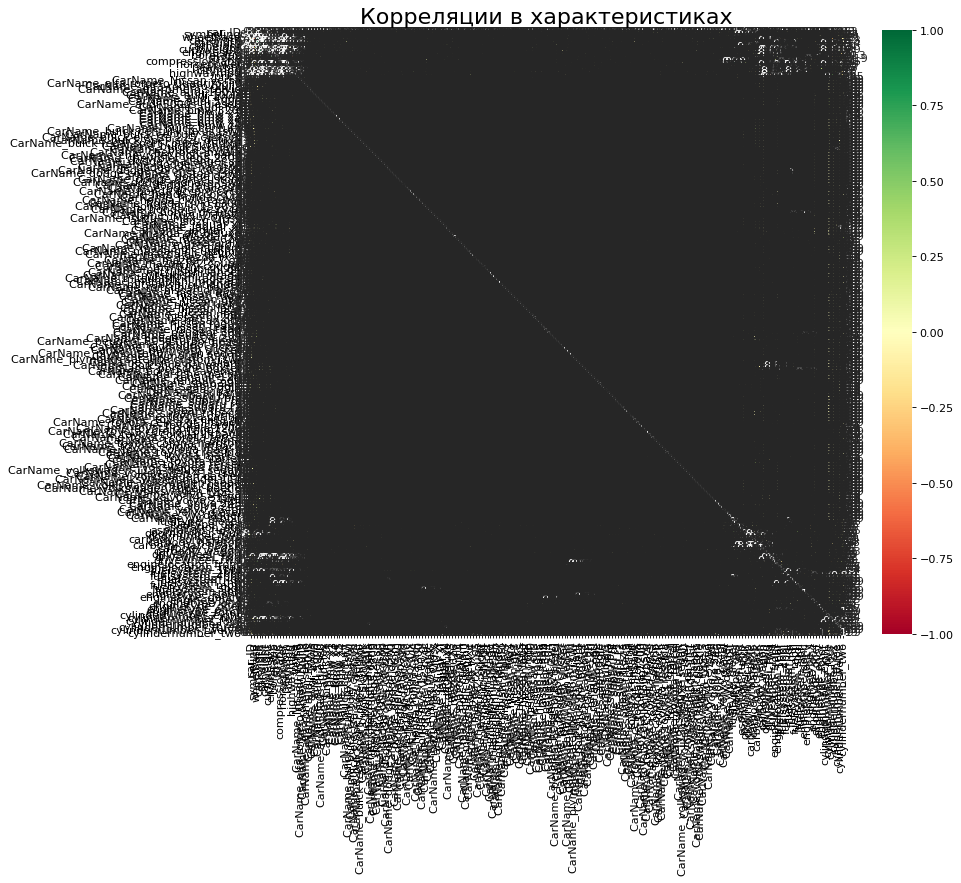

In [32]:

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()


In [34]:
y = df['price']
x = df.drop(columns='price')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

93026.28990454898 [ 3.90585455e+02  6.49448049e+02  2.58483390e+02 -4.15628941e+02
 -8.88437795e+02 -9.21929392e+02  8.29917575e+00  9.15706743e+00
 -1.82429324e+03 -1.68765128e+03  1.65622526e+03  8.38980696e+01
  5.81452522e-01  4.71902898e+02 -2.81297021e+02 -9.85778627e+02
  3.78908958e+04  1.60224812e+04  1.86368957e+04  3.81798515e+04
  2.49141277e+04  3.49766651e-08 -7.79875791e-08 -2.31937065e-08
 -3.42860176e-08  3.90115639e+04  4.43690152e+04  4.21298125e+04
  5.18096048e+04  1.80771167e-08  4.94036117e+04  1.49467053e+04
  3.78349796e-09 -3.04294190e-09  5.05679054e-10  1.81816274e+04
  4.09727363e-09  1.76024256e+04 -1.00577762e+04 -1.39607437e-10
  3.76007847e-09  5.55348834e-09  1.98014702e+04  1.64854825e+04
  1.59590679e+04  1.71256914e+04  1.18430380e+04  1.91305579e+04
  2.82075364e+04  1.64055259e+04  1.94364702e-09  3.22240651e+04
  2.47342493e+04  2.95214711e+04  2.30753645e+04  1.78907082e+04
  3.26644571e+04  1.65073288e-09  2.47514269e+04  3.40569429e+04
 -4.059

In [37]:


ans = str(w0)
for i in range(8):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)
    

93026.28990454898 + 390.5854552819597 * x1 + 649.4480490706025 * x2 + 258.4833904540045 * x3 + -415.6289407318821 * x4 + -888.4377947101644 * x5 + -921.9293916466122 * x6 + 8.299175750508311 * x7 + 9.157067427612645 * x8


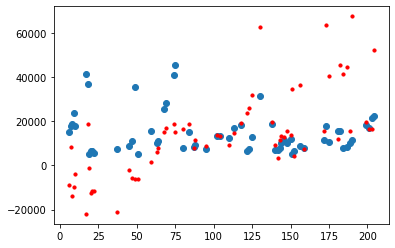

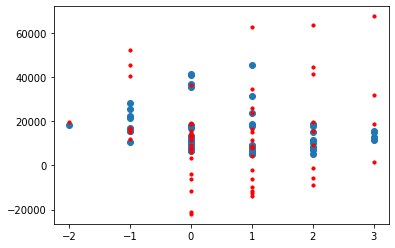

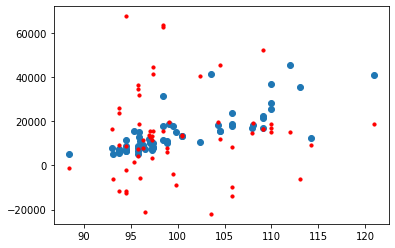

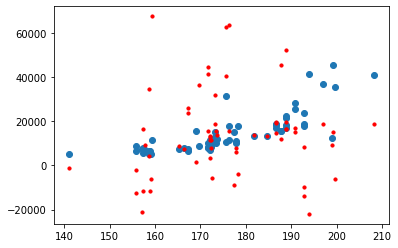

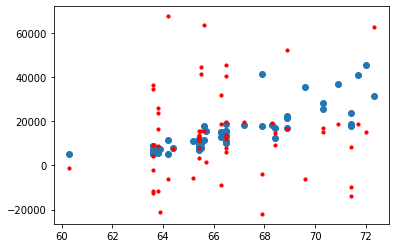

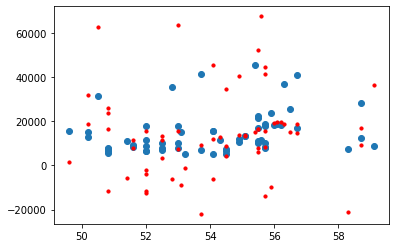

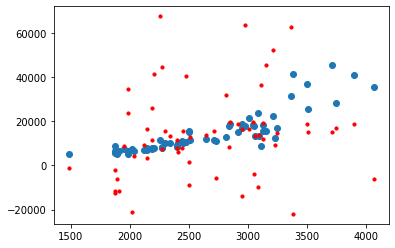

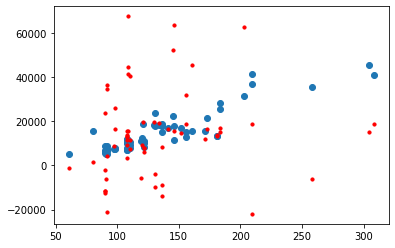

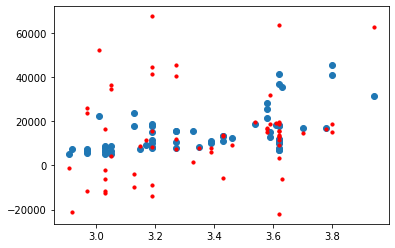

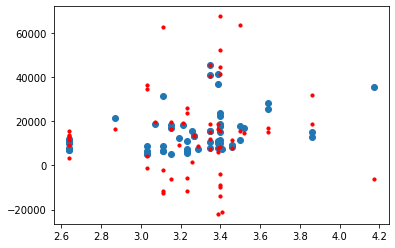

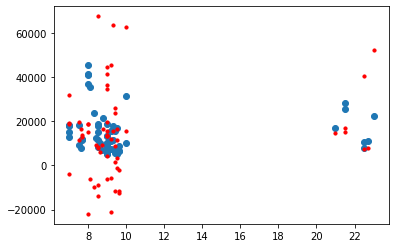

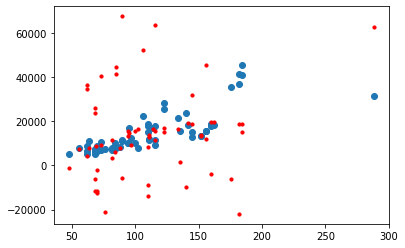

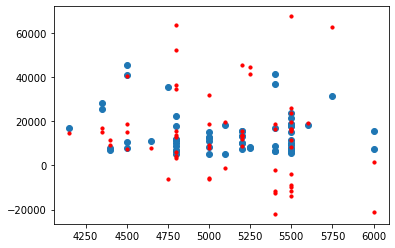

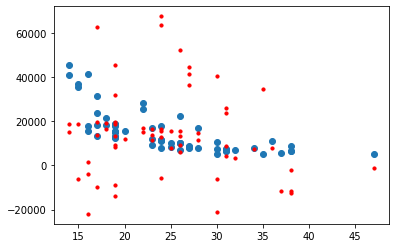

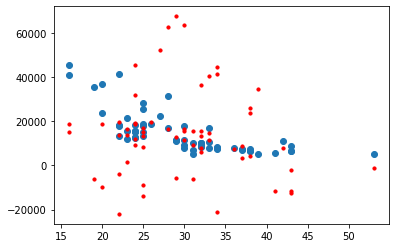

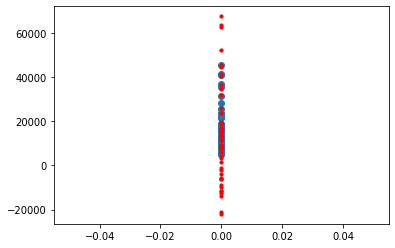

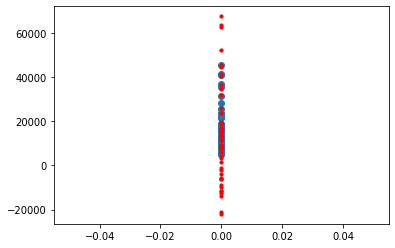

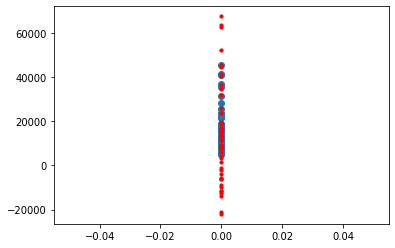

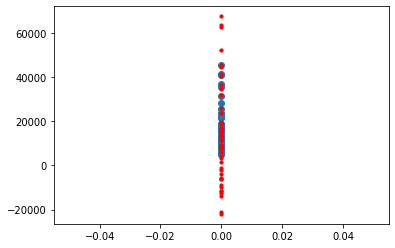

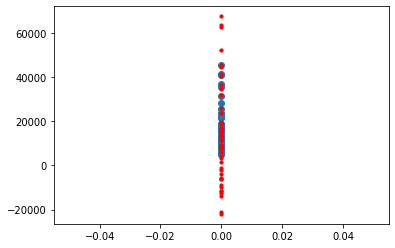

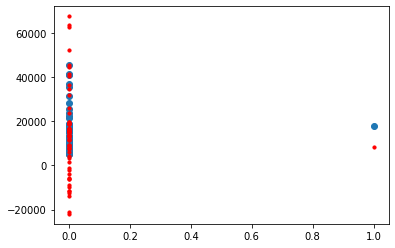

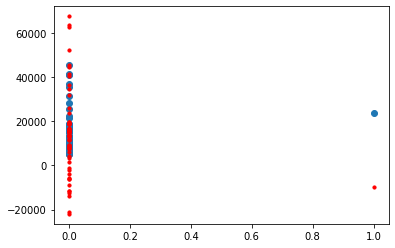

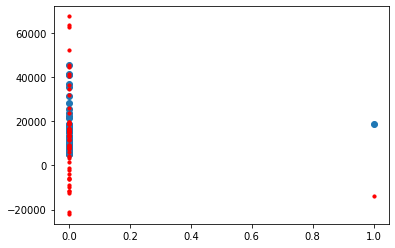

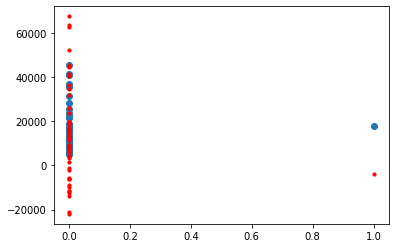

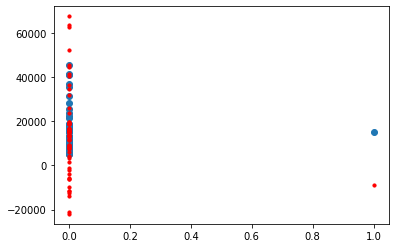

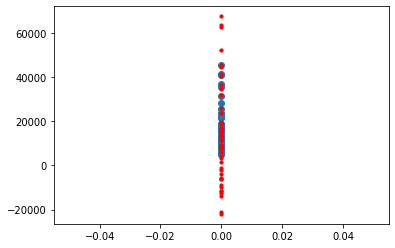

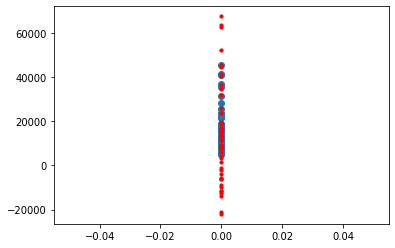

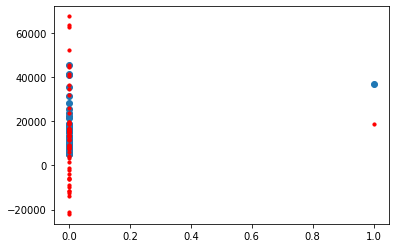

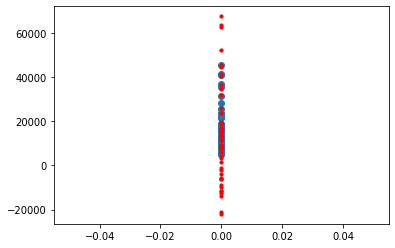

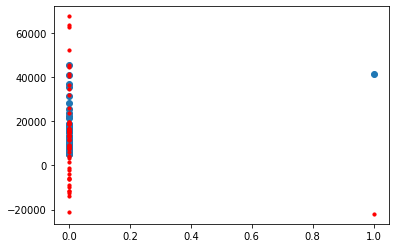

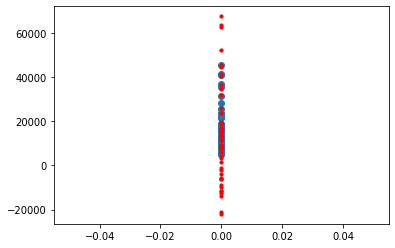

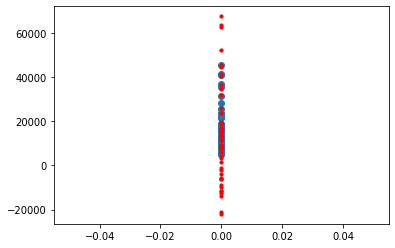

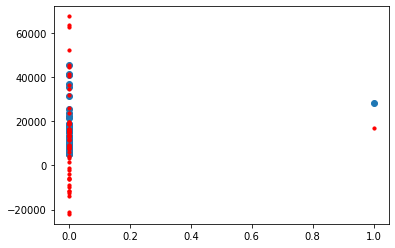

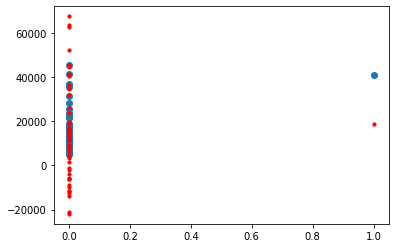

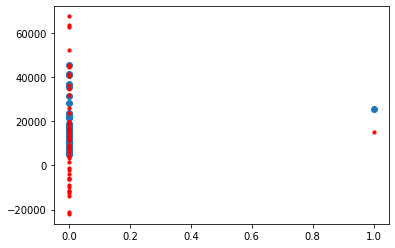

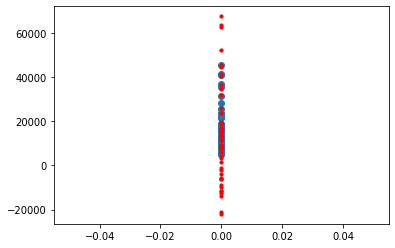

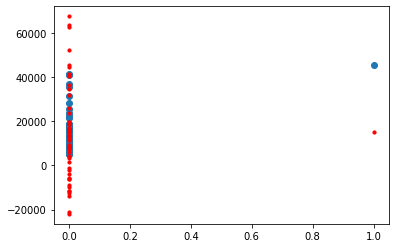

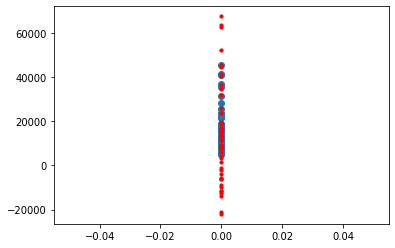

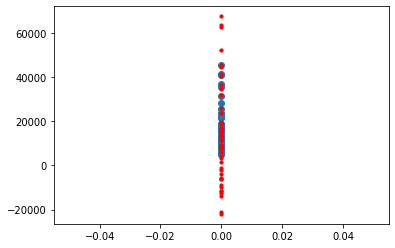

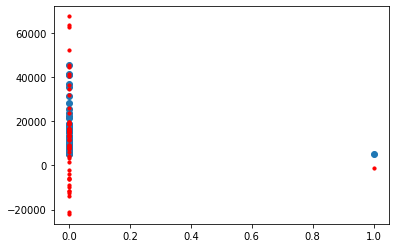

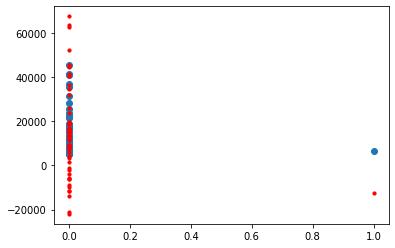

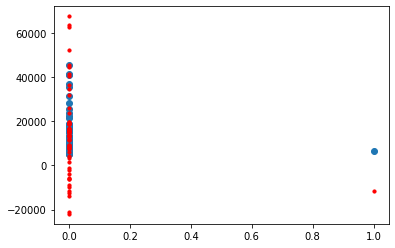

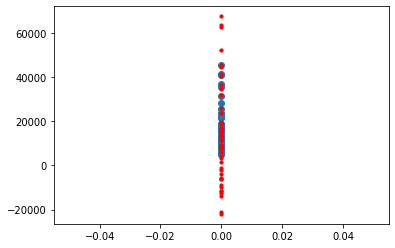

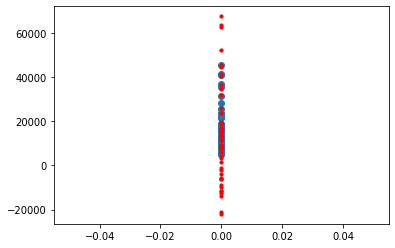

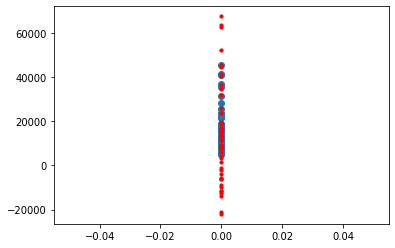

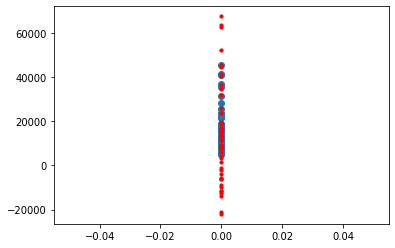

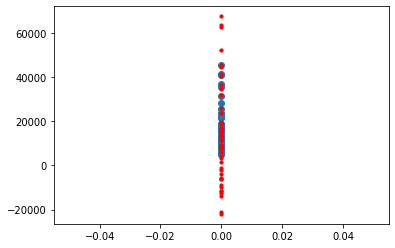

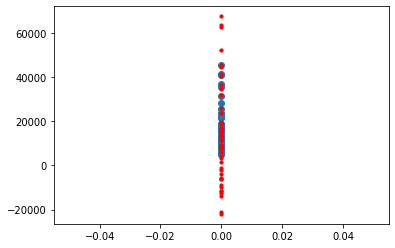

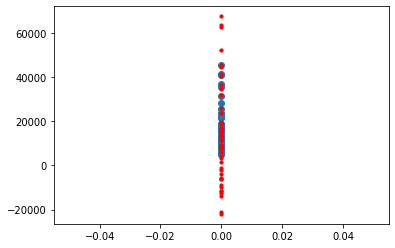

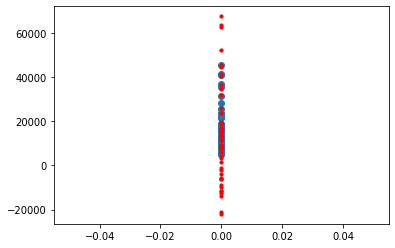

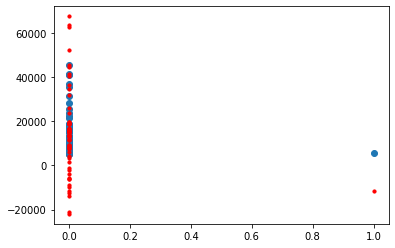

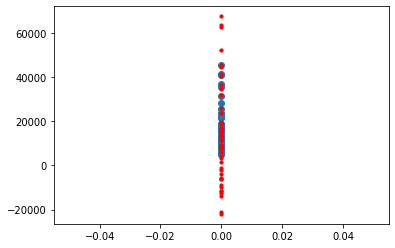

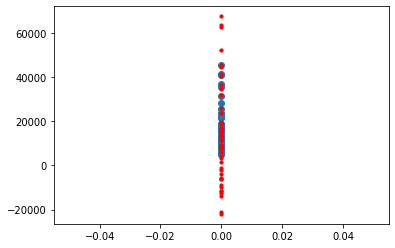

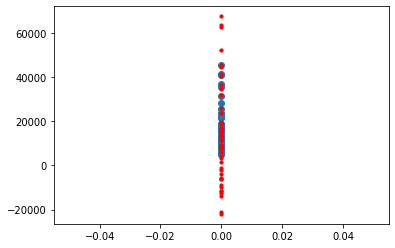

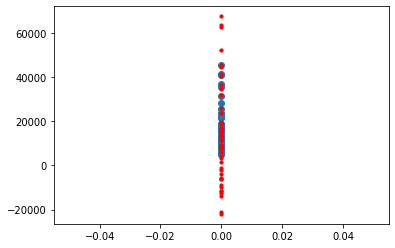

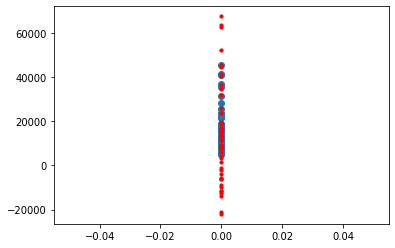

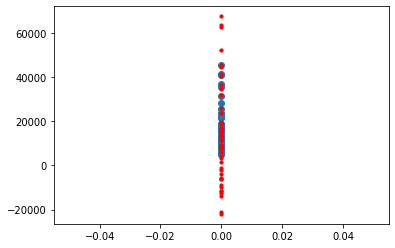

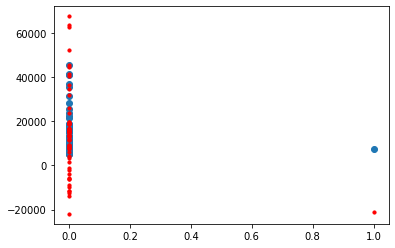

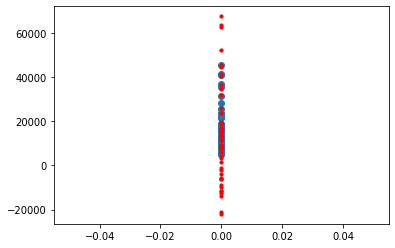

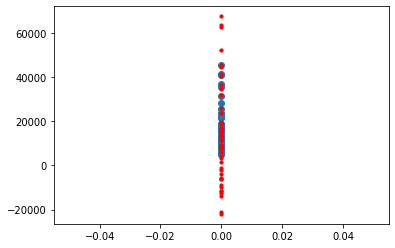

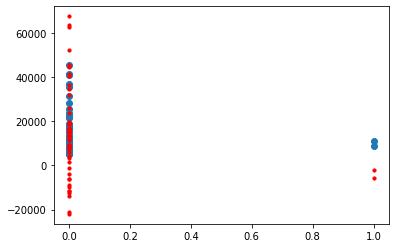

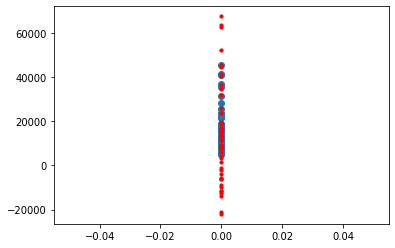

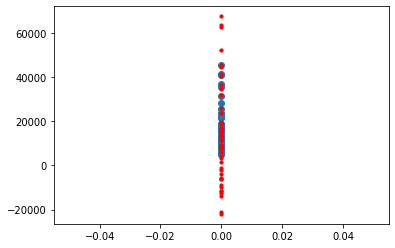

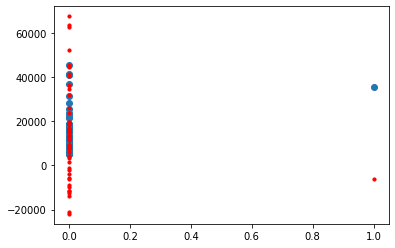

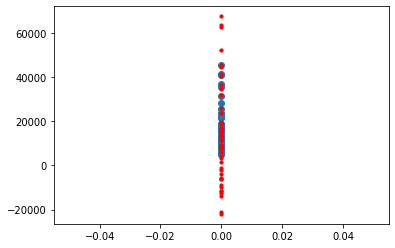

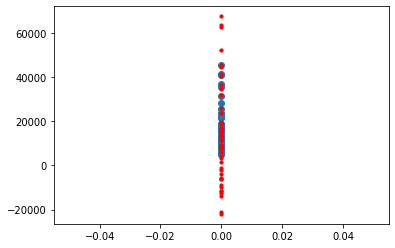

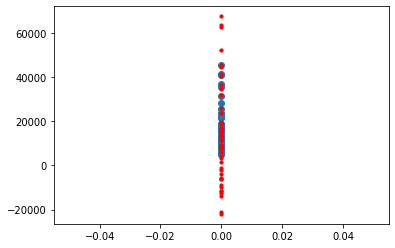

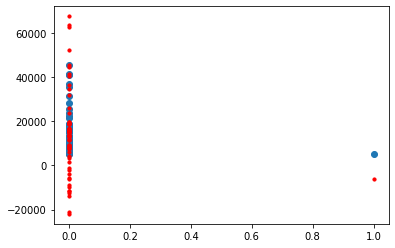

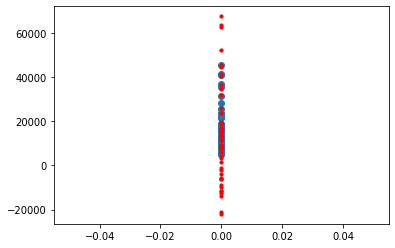

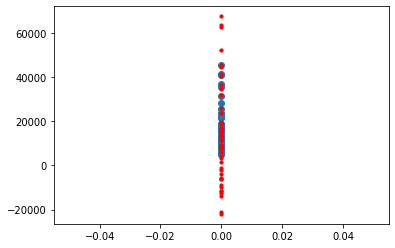

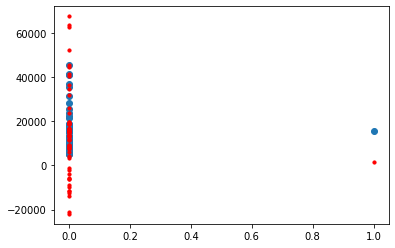

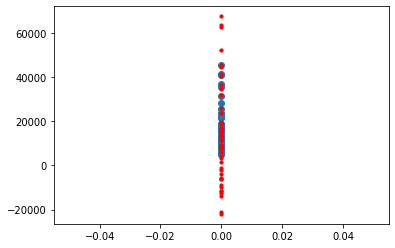

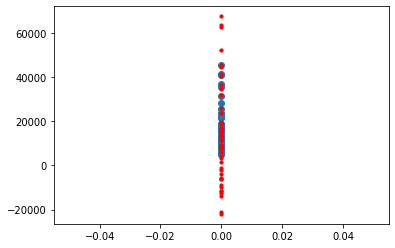

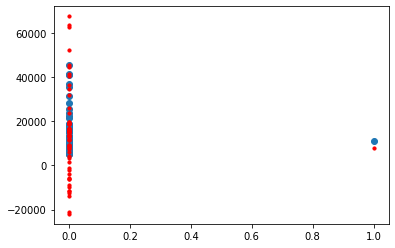

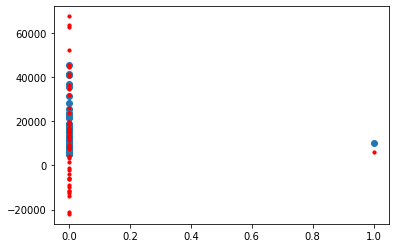

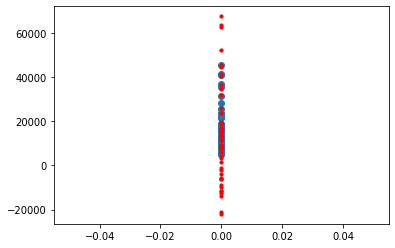

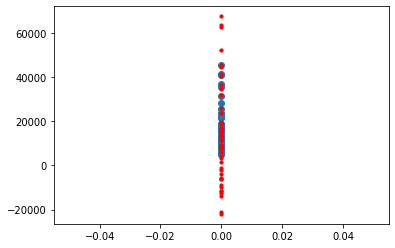

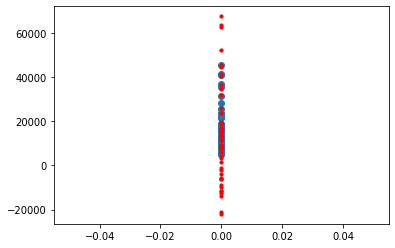

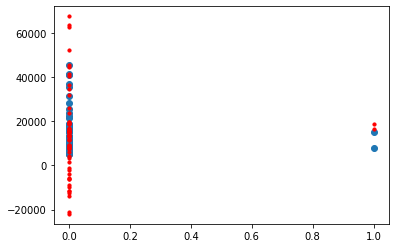

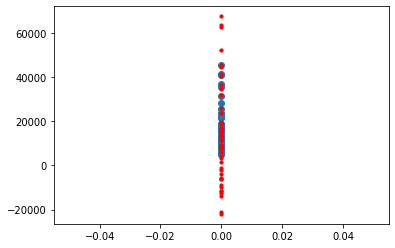

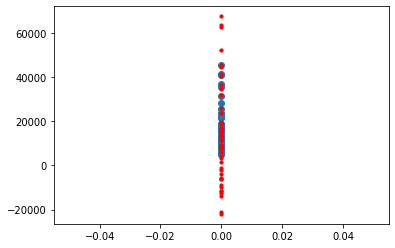

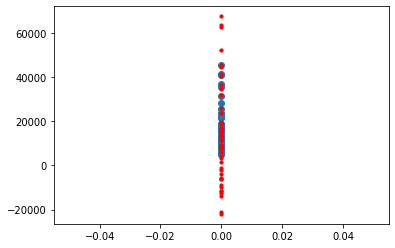

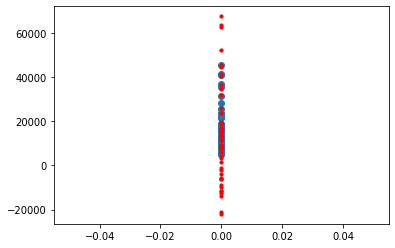

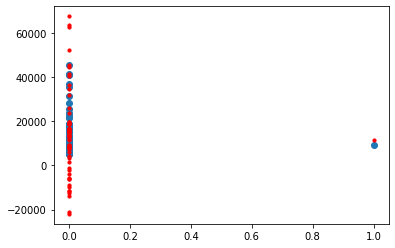

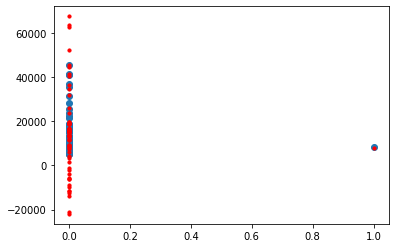

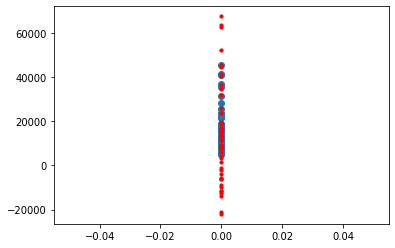

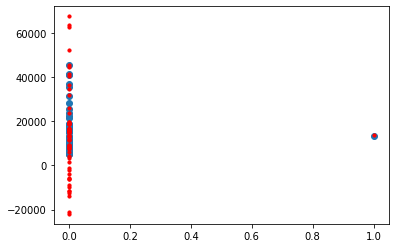

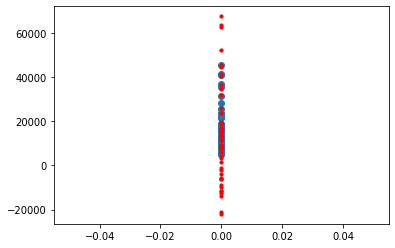

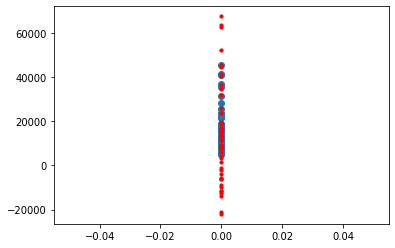

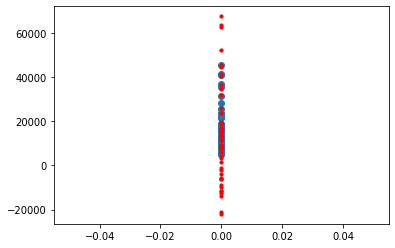

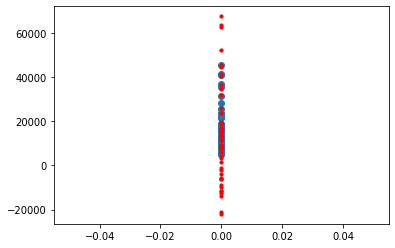

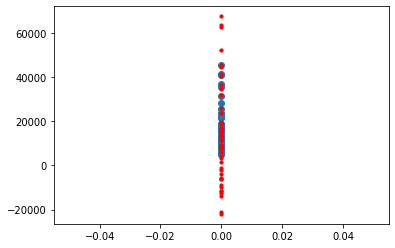

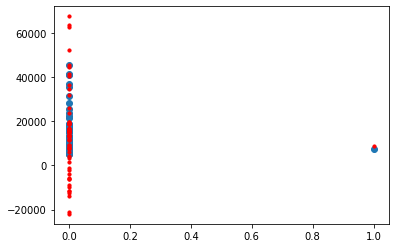

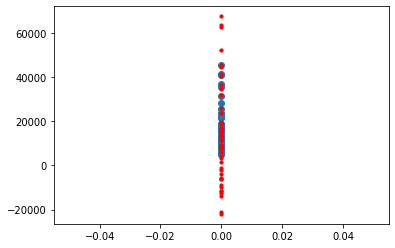

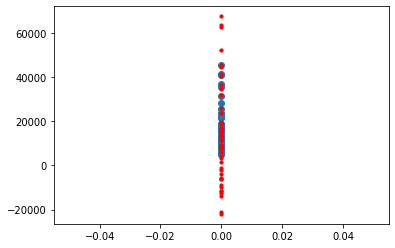

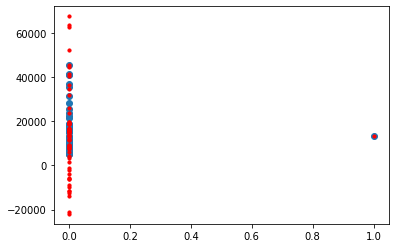

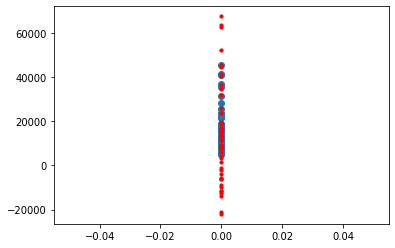

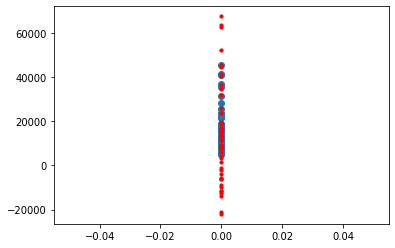

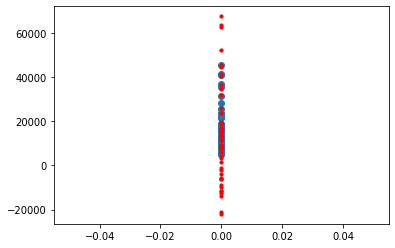

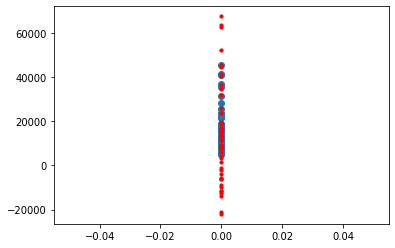

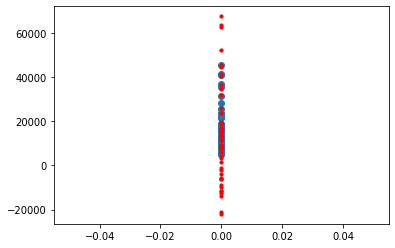

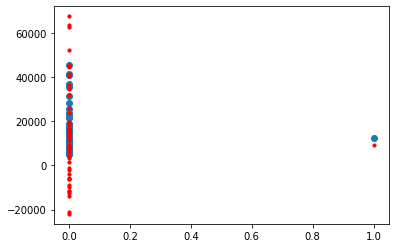

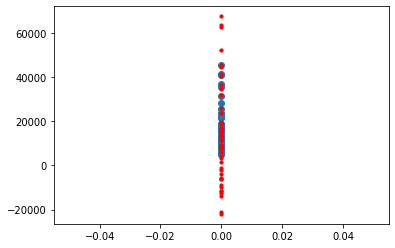

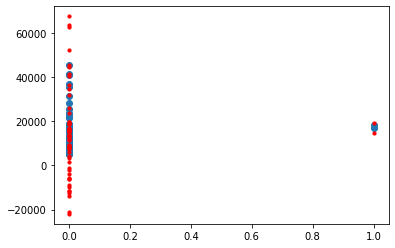

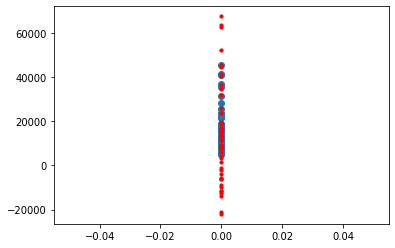

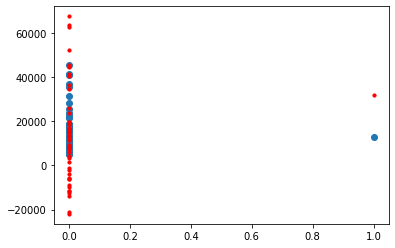

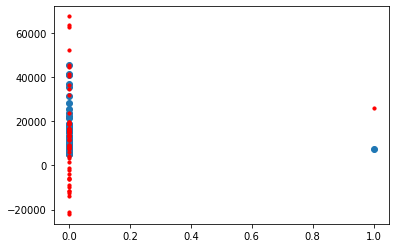

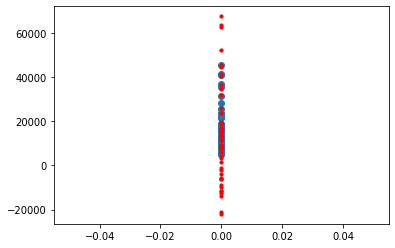

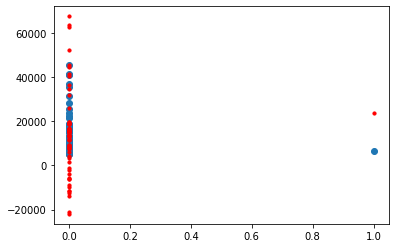

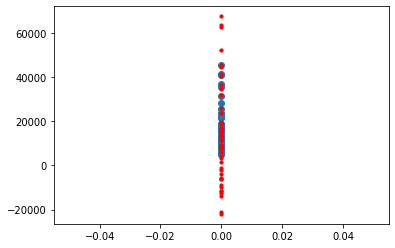

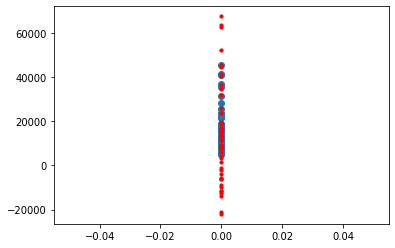

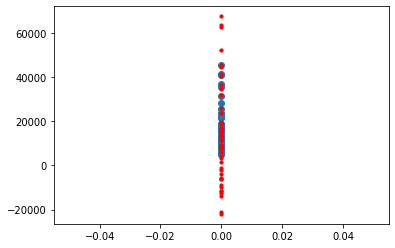

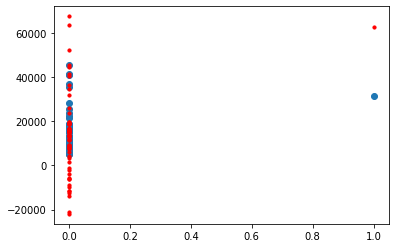

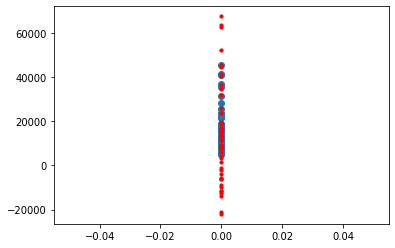

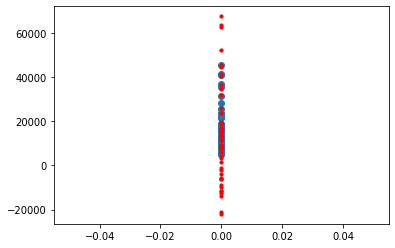

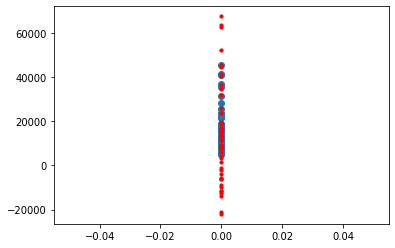

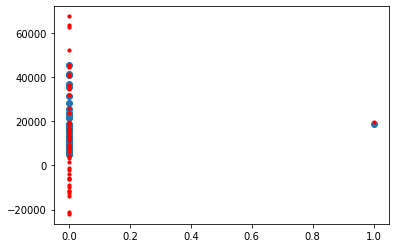

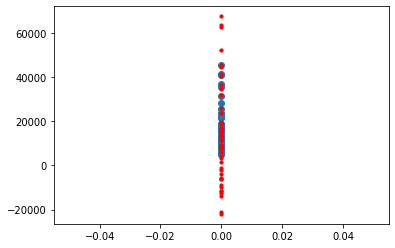

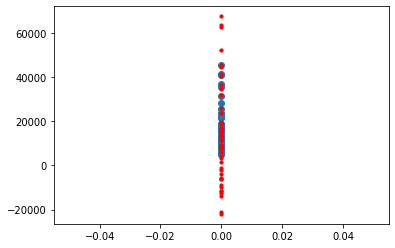

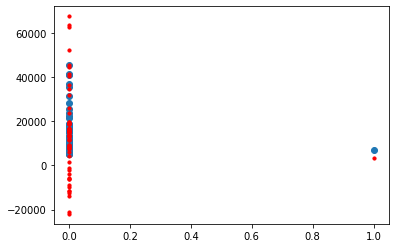

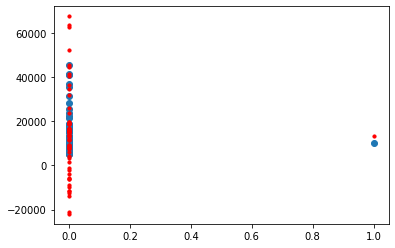

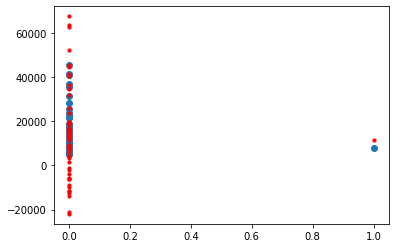

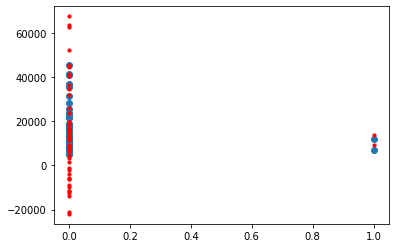

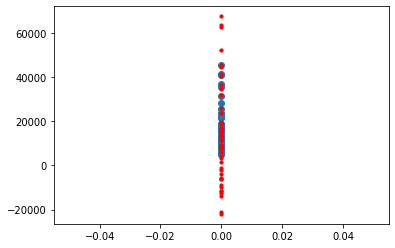

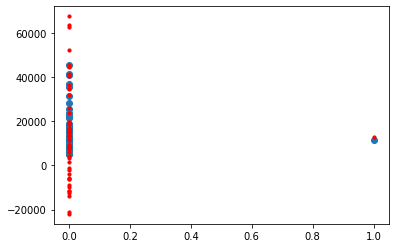

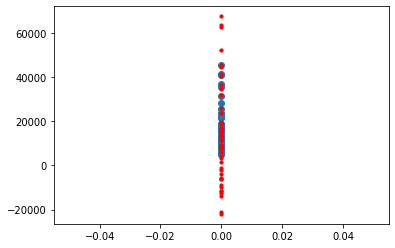

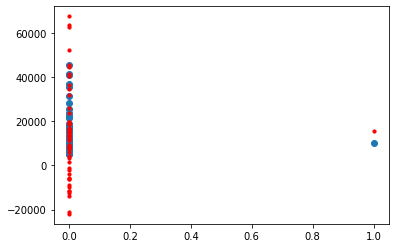

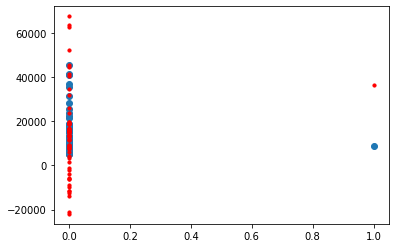

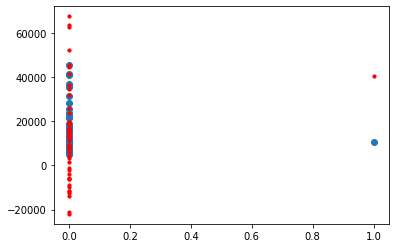

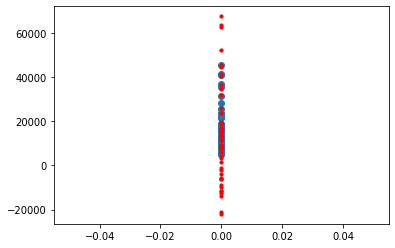

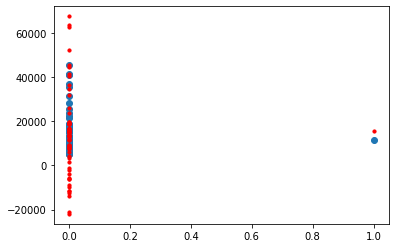

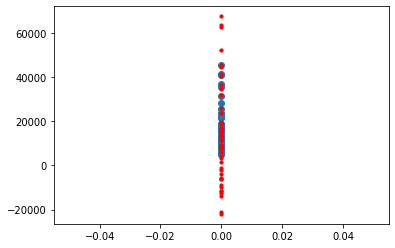

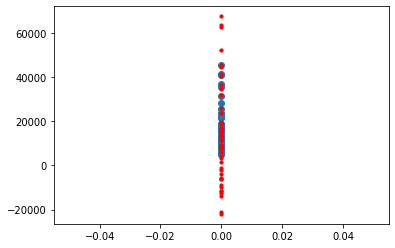

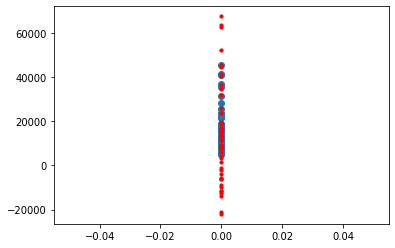

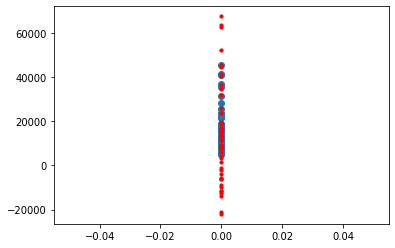

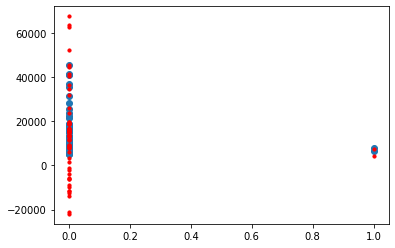

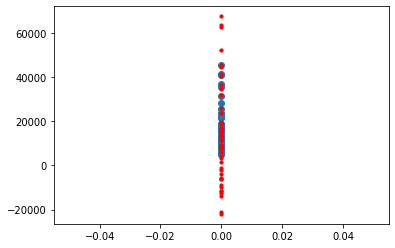

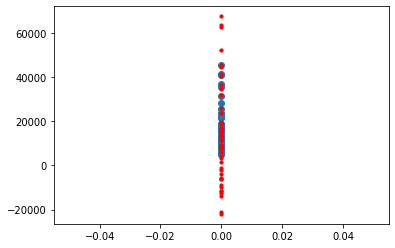

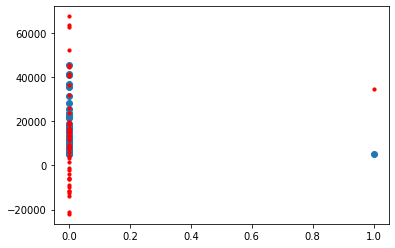

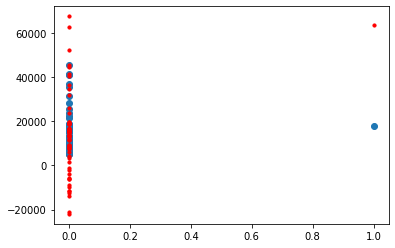

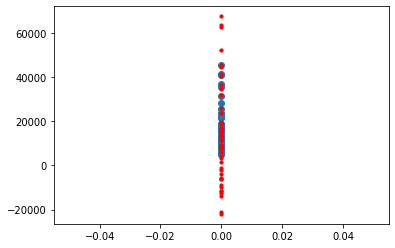

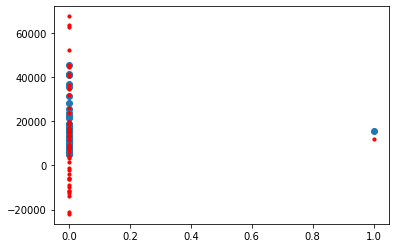

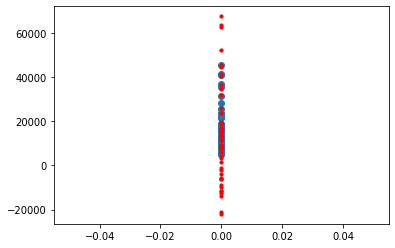

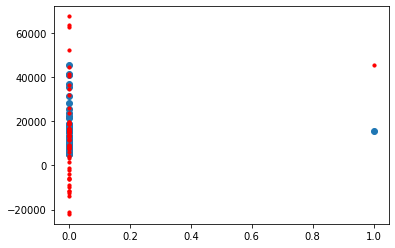

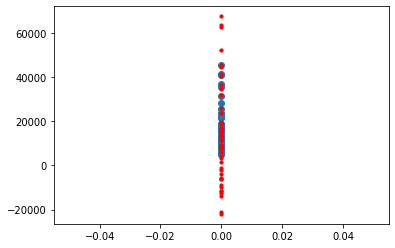

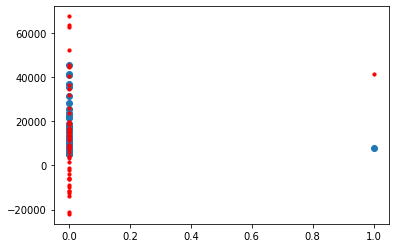

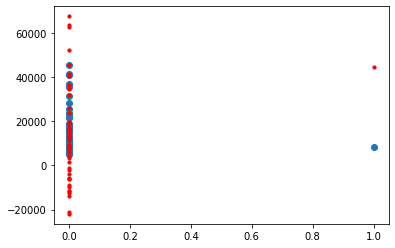

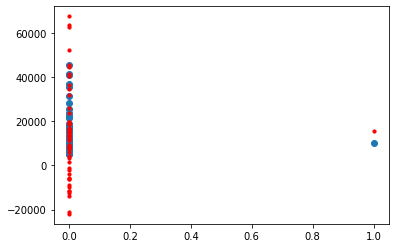

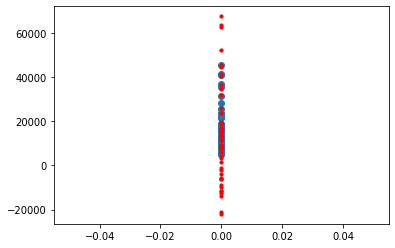

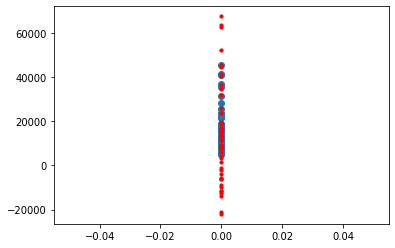

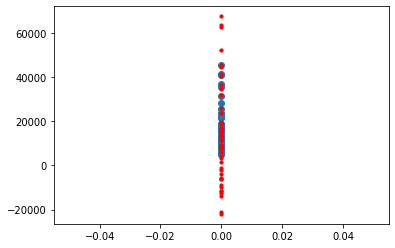

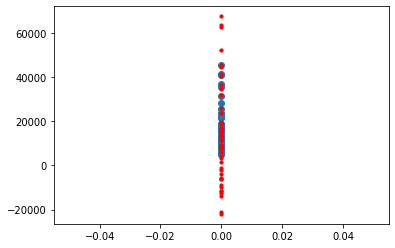

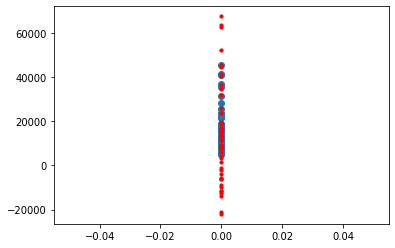

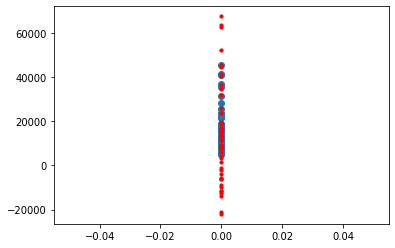

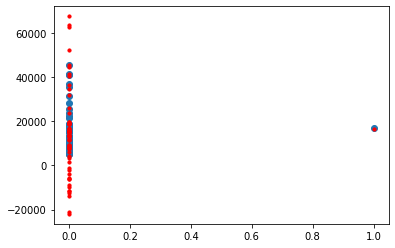

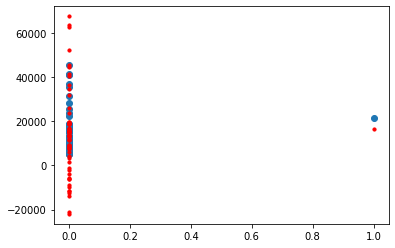

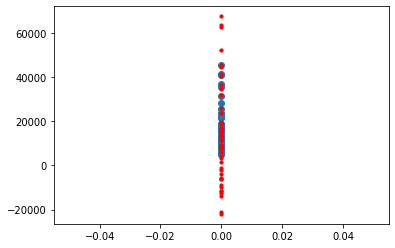

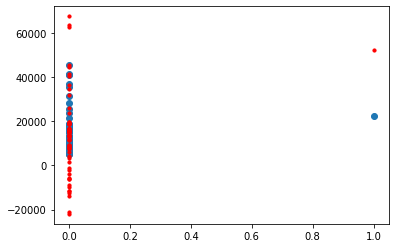

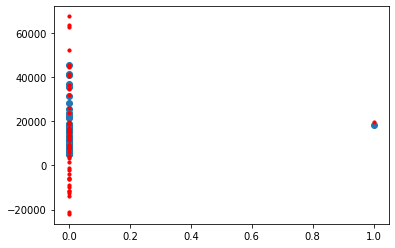

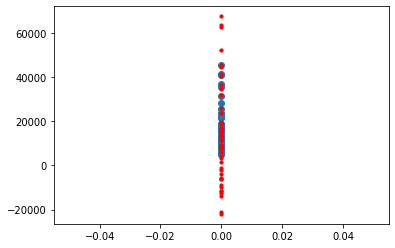

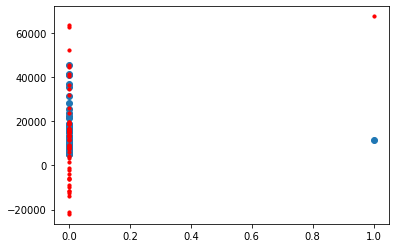

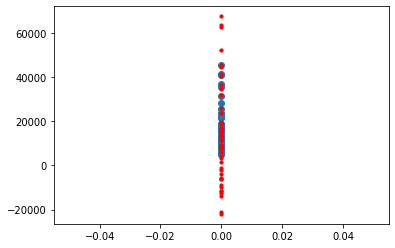

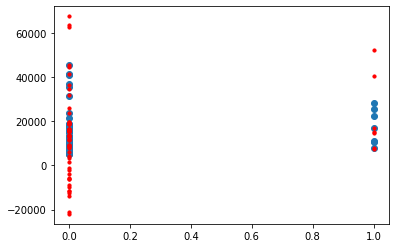

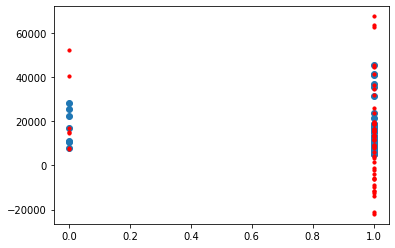

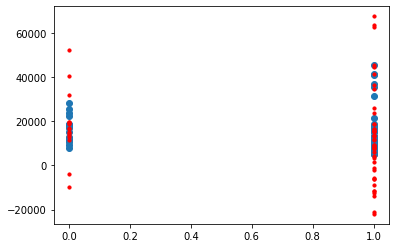

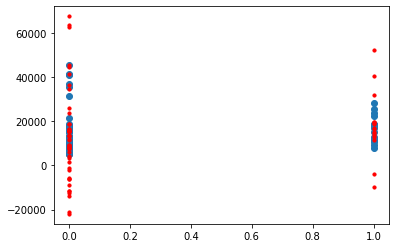

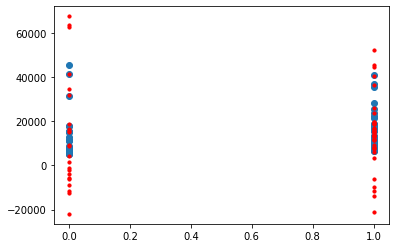

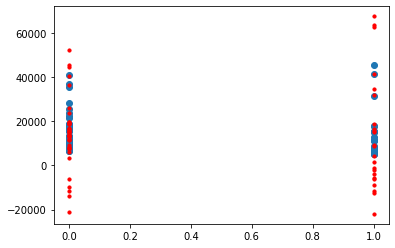

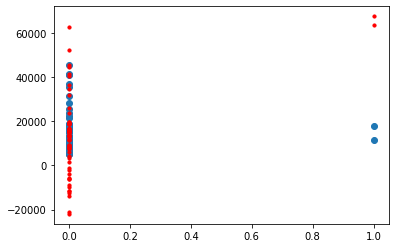

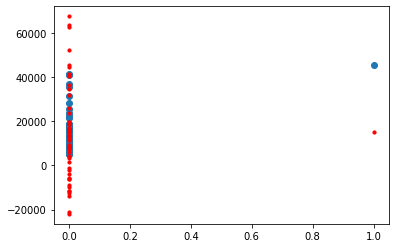

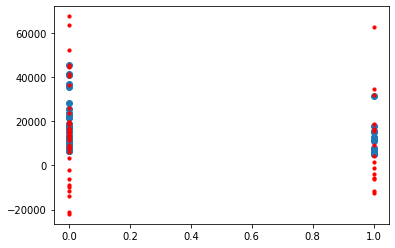

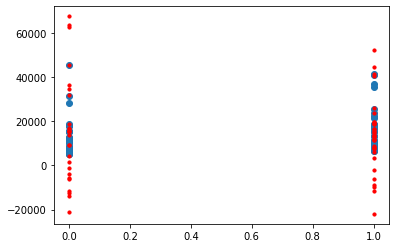

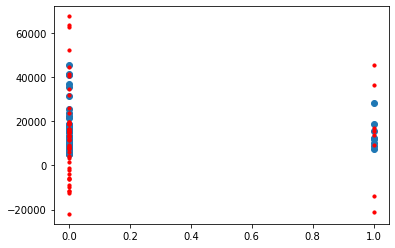

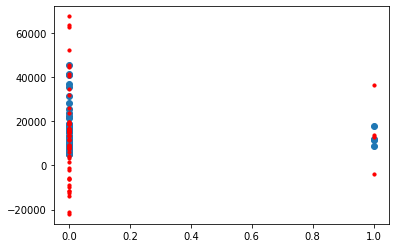

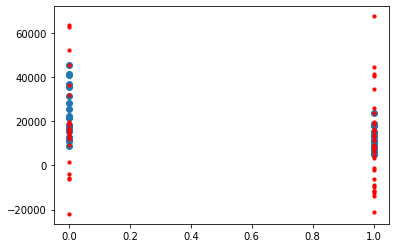

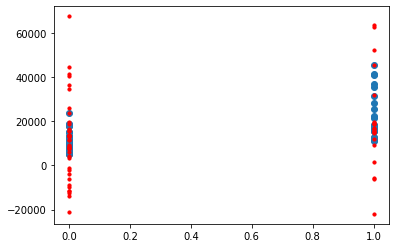

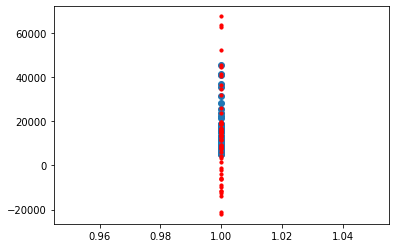

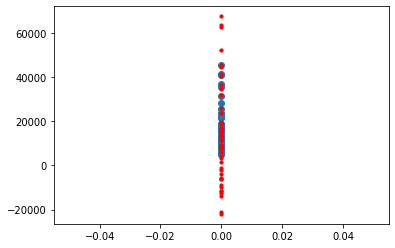

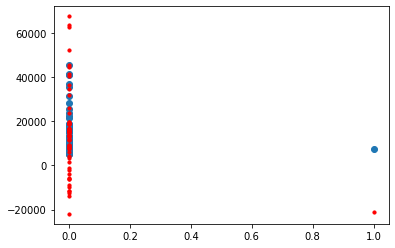

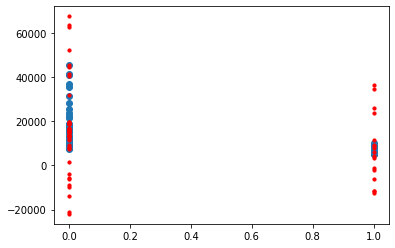

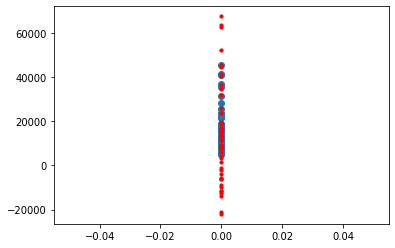

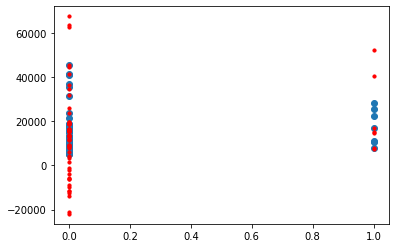

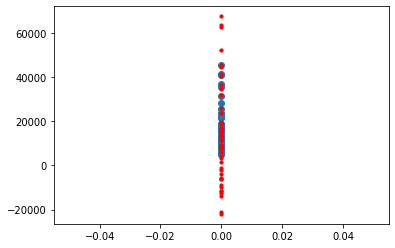

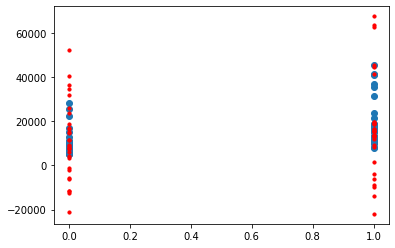

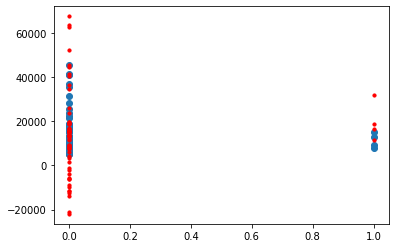

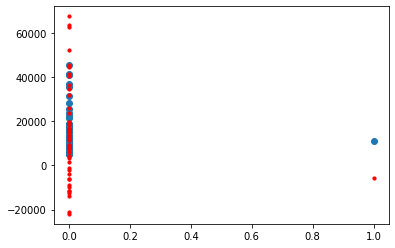

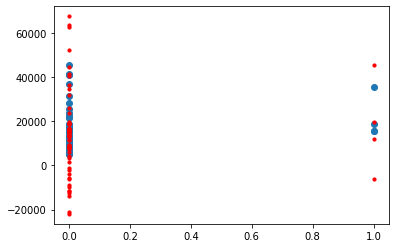

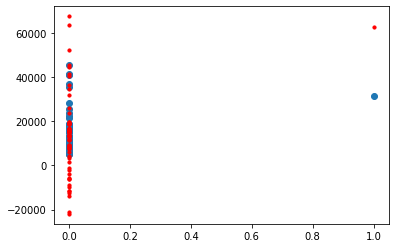

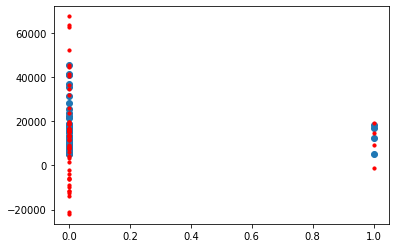

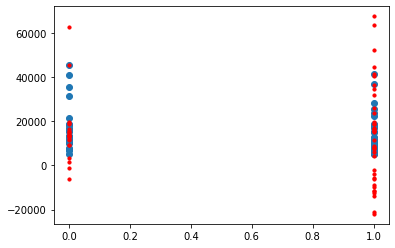

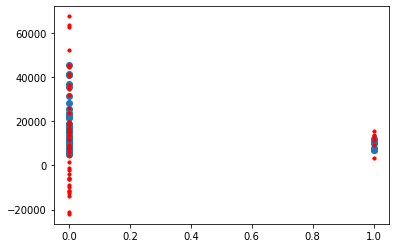

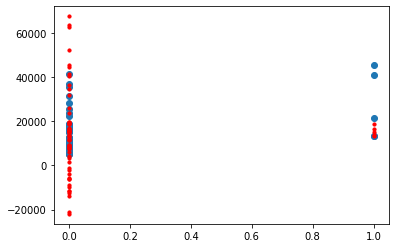

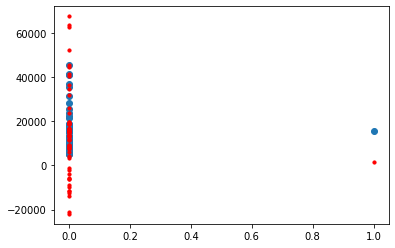

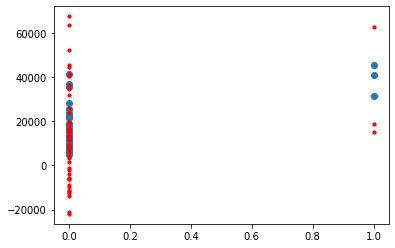

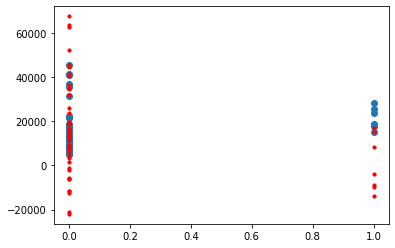

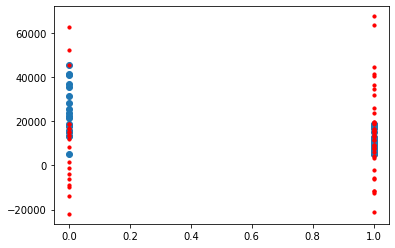

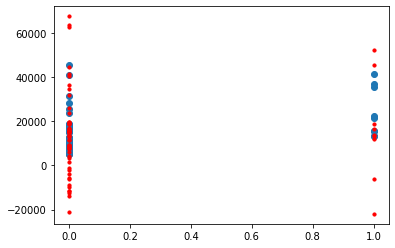

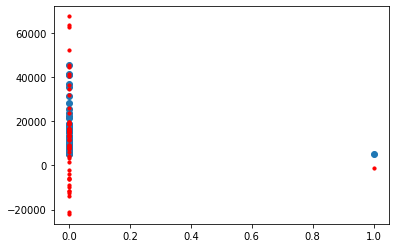

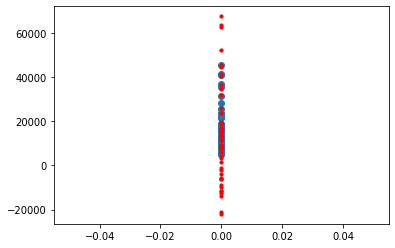

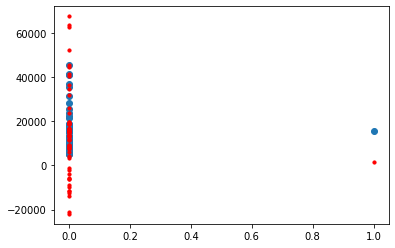

In [38]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [39]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 15154.205750671785
Mean Squared Error: 448120800.159186
R2 score: -3.9759523318194283


Средний квадрат и модуль ошибки слишком большие, значит обученная модель работает слишком плохо